We are trying to see a change in the times emails were sent over time. If work time increased than the emails should be more spread out as time continues. For this the average time for sending an email per person will be subtracted from the times for each person, as it appears from exp004 that the employees are working in different timezones. Otherwise the spread might increase when a new branch in a new timezone is opened.

In [2]:
%run ../src/parse_mails.py
import matplotlib.pyplot as plt

df = parse_maildir("../data/maildir")
df

,name,date,parsed_date,time,day,tz
../data/maildir/tycholiz-b/sent_items/155.,tycholiz-b,"Date: Fri, 12 Oct 2001 10:57:02 -0700 (PDT)\n",2001-10-12 10:57:02-07:00,10:57:02,2001-10-12,PDT
../data/maildir/tycholiz-b/sent_items/113.,tycholiz-b,"Date: Fri, 28 Sep 2001 09:36:02 -0700 (PDT)\n",2001-09-28 09:36:02-07:00,09:36:02,2001-09-28,PDT
../data/maildir/tycholiz-b/sent_items/408.,tycholiz-b,"Date: Tue, 6 Nov 2001 07:13:09 -0800 (PST)\n",2001-11-06 07:13:09-08:00,07:13:09,2001-11-06,PST
../data/maildir/tycholiz-b/sent_items/247.,tycholiz-b,"Date: Fri, 30 Nov 2001 07:57:29 -0800 (PST)\n",2001-11-30 07:57:29-08:00,07:57:29,2001-11-30,PST
../data/maildir/tycholiz-b/sent_items/216.,tycholiz-b,"Date: Fri, 26 Oct 2001 10:49:36 -0700 (PDT)\n",2001-10-26 10:49:36-07:00,10:49:36,2001-10-26,PDT
...,...,...,...,...,...,...
../data/maildir/dickson-s/sent/85.,dickson-s,"Date: Wed, 11 Apr 2001 04:29:00 -0700 (PDT)\n",2001-04-11 04:29:00-07:00,04:29:00,2001-04-11,PDT
../data/maildir/dickson-s/sent/3.,dickson-s,"Date: Fri, 9 Mar 2001 01:50:00 -0800 (PST)\n",2001-03-09 01:50:00-08:00,01:50:00,2001-03-09,PST
../data/maildir/dickson-s/sent/81.,dickson-s,"Date: Wed, 11 Apr 2001 02:29:00 -0700 (PDT)\n",2001-04-11 02:29:00-07:00,02:29:00,2001-04-11,PDT
../data/maildir/dickson-s/sent/38.,dickson-s,"Date: Wed, 28 Mar 2001 03:57:00 -0800 (PST)\n",2001-03-28 03:57:00-08:00,03:57:00,2001-03-28,PST


In [3]:
df["seconds_since_midnight"] = df["time"].apply(lambda x: x.hour * 60 * 60 + x.minute * 60 + x.second)
df["date_seconds"] = list(zip(df["day"], df["seconds_since_midnight"]))
grouped_times = df.groupby("name")["date_seconds"].apply(list).reset_index()
grouped_times

,name,date_seconds
0,allen-p,"[(2001-07-17, 48769), (2001-06-20, 27749), (20..."
1,arnold-j,"[(2001-05-29, 51927), (2001-11-07, 23410), (20..."
2,arora-h,"[(2001-11-29, 23656), (2001-12-03, 43893), (20..."
3,badeer-r,"[(2002-03-07, 30223), (2002-03-08, 32348), (20..."
4,bailey-s,"[(2001-11-21, 35322), (2001-11-16, 34236), (20..."
...,...,...
143,williams-w3,"[(2001-10-23, 55894), (2001-11-06, 58104), (20..."
144,wolfe-j,"[(2001-06-04, 49958), (2001-10-29, 47650), (20..."
145,ybarbo-p,"[(2001-11-09, 35093), (2001-04-17, 55380), (20..."
146,zipper-a,"[(2001-06-06, 26865), (2001-06-01, 32966), (20..."


In [4]:
# Center the mail times
def center_tuple_list(a):
    mean = np.array([n[1] for n in a]).mean()
    return [(n[0], n[1] - mean) for n in a]


grouped_times["date_centered_seconds"] = grouped_times["date_seconds"].apply(lambda x: center_tuple_list(x))
grouped_times

,name,date_seconds,date_centered_seconds
0,allen-p,"[(2001-07-17, 48769), (2001-06-20, 27749), (20...","[(2001-07-17, 21463.326043737576), (2001-06-20..."
1,arnold-j,"[(2001-05-29, 51927), (2001-11-07, 23410), (20...","[(2001-05-29, 19029.47216319592), (2001-11-07,..."
2,arora-h,"[(2001-11-29, 23656), (2001-12-03, 43893), (20...","[(2001-11-29, -14246.259740259738), (2001-12-0..."
3,badeer-r,"[(2002-03-07, 30223), (2002-03-08, 32348), (20...","[(2002-03-07, 4563.169491525423), (2002-03-08,..."
4,bailey-s,"[(2001-11-21, 35322), (2001-11-16, 34236), (20...","[(2001-11-21, -2282.7142857142826), (2001-11-1..."
...,...,...,...
143,williams-w3,"[(2001-10-23, 55894), (2001-11-06, 58104), (20...","[(2001-10-23, 2693.1599229287094), (2001-11-06..."
144,wolfe-j,"[(2001-06-04, 49958), (2001-10-29, 47650), (20...","[(2001-06-04, 8113.032258064515), (2001-10-29,..."
145,ybarbo-p,"[(2001-11-09, 35093), (2001-04-17, 55380), (20...","[(2001-11-09, -12455.06923076923), (2001-04-17..."
146,zipper-a,"[(2001-06-06, 26865), (2001-06-01, 32966), (20...","[(2001-06-06, -8834.442857142858), (2001-06-01..."


In [5]:
centered_seconds = pd.DataFrame(np.vstack(grouped_times["date_centered_seconds"].to_numpy()), columns=["date", "seconds"])
centered_seconds

,date,seconds
0,2001-07-17,21463.326044
1,2001-06-20,443.326044
2,2001-09-11,-1930.673956
3,2001-08-21,-7160.673956
4,2001-07-17,21524.326044
...,...,...
125943,2002-02-06,-2699.233728
125944,2001-09-18,-9785.233728
125945,2001-12-17,-14011.233728
125946,2002-01-24,12586.766272


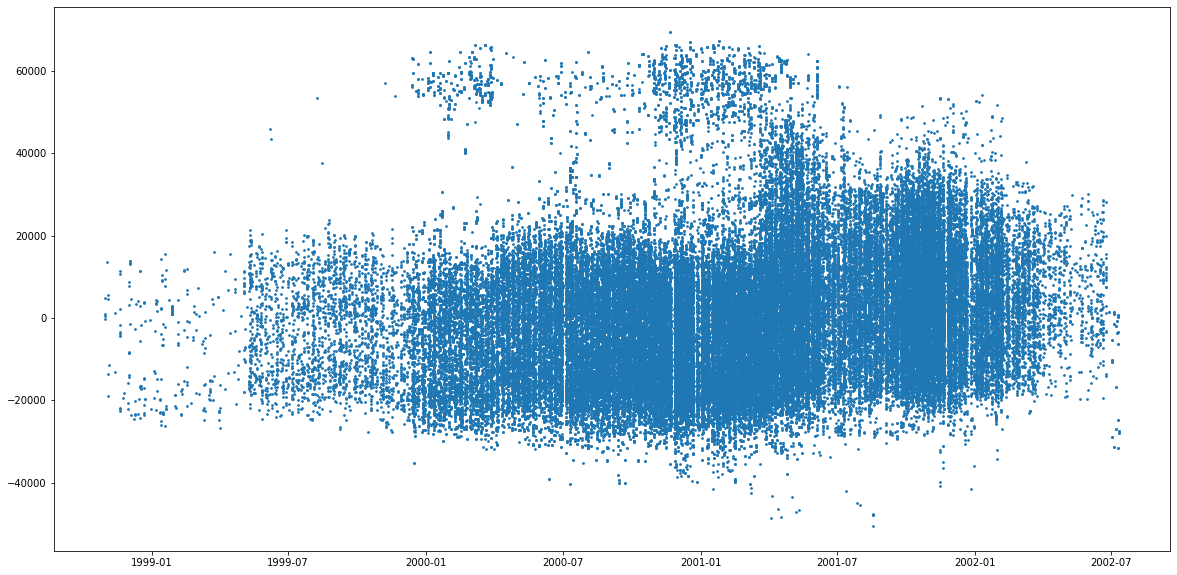

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(20, 10))
axs.scatter(centered_seconds["date"], centered_seconds["seconds"], s=3)
plt.show()

For comparison purposes the uncentered times are also shown below.

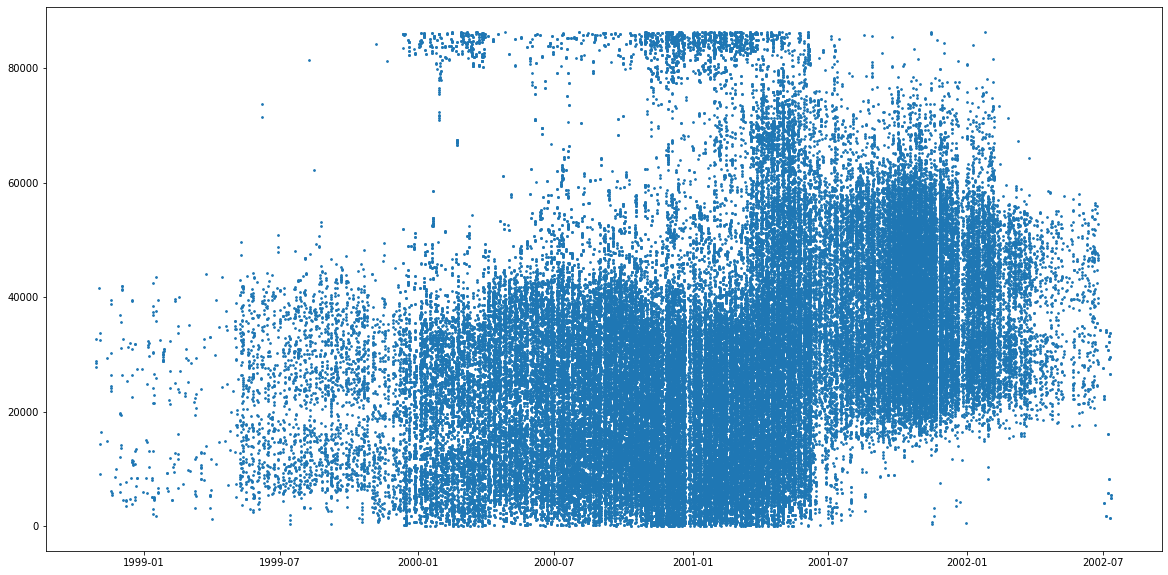

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(20, 10))
axs.scatter(df["day"], df["seconds_since_midnight"], s=3)
plt.show()

There appears to be some kind of shift in the times of sent emails at 2001-07. This shift is not seen in the centered version. One possible explanation could be that a branch located in the east (relative to the other branches, with earlier work times) was closed, creating a sudden drop in the amount of emails sent very early. To check for this hypothesis the last dates an email was sent by an employee are plotted. If this hypothesis is indeed true than one would expect a lot of last emails being sent on or around 2001-07.

In [8]:
grouped_times["date_seconds"].apply(lambda x: len(x)).sum()

125948

In [9]:
grouped_dates = df.groupby("name")["day"].apply(list).reset_index()
grouped_dates

,name,day
0,allen-p,"[2001-07-17, 2001-06-20, 2001-09-11, 2001-08-2..."
1,arnold-j,"[2001-05-29, 2001-11-07, 2001-10-22, 2001-04-1..."
2,arora-h,"[2001-11-29, 2001-12-03, 2001-11-05, 2001-11-0..."
3,badeer-r,"[2002-03-07, 2002-03-08, 2002-03-07, 2002-03-0..."
4,bailey-s,"[2001-11-21, 2001-11-16, 2001-11-27, 2001-10-2..."
...,...,...
143,williams-w3,"[2001-10-23, 2001-11-06, 2001-08-07, 2001-07-1..."
144,wolfe-j,"[2001-06-04, 2001-10-29, 2001-10-31, 2001-11-2..."
145,ybarbo-p,"[2001-11-09, 2001-04-17, 2001-04-24, 2001-10-2..."
146,zipper-a,"[2001-06-06, 2001-06-01, 2001-10-09, 2001-10-1..."


In [11]:
grouped_dates["last_day"] = grouped_dates["day"].apply(lambda x: np.array(x).max())
grouped_dates

,name,day,last_day
0,allen-p,"[2001-07-17, 2001-06-20, 2001-09-11, 2001-08-2...",2001-12-19
1,arnold-j,"[2001-05-29, 2001-11-07, 2001-10-22, 2001-04-1...",2001-12-27
2,arora-h,"[2001-11-29, 2001-12-03, 2001-11-05, 2001-11-0...",2001-12-27
3,badeer-r,"[2002-03-07, 2002-03-08, 2002-03-07, 2002-03-0...",2002-03-08
4,bailey-s,"[2001-11-21, 2001-11-16, 2001-11-27, 2001-10-2...",2002-02-14
...,...,...,...
143,williams-w3,"[2001-10-23, 2001-11-06, 2001-08-07, 2001-07-1...",2002-02-05
144,wolfe-j,"[2001-06-04, 2001-10-29, 2001-10-31, 2001-11-2...",2001-11-27
145,ybarbo-p,"[2001-11-09, 2001-04-17, 2001-04-24, 2001-10-2...",2001-11-26
146,zipper-a,"[2001-06-06, 2001-06-01, 2001-10-09, 2001-10-1...",2002-02-06


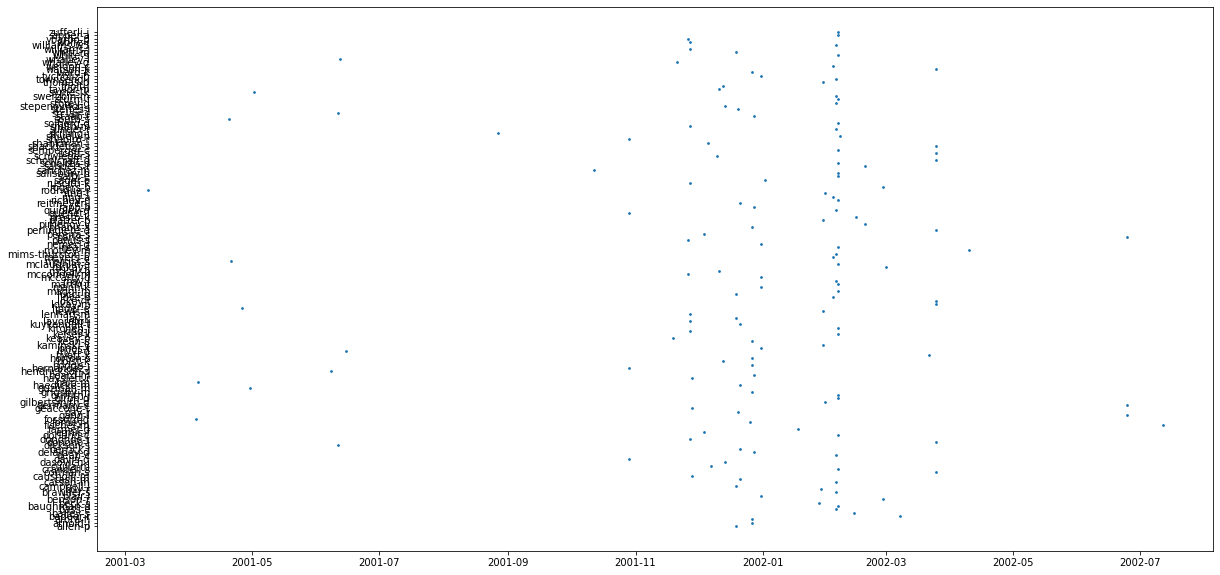

In [12]:
fig, axs = plt.subplots(1, 1, figsize=(20, 10))
axs.scatter(grouped_dates["last_day"], grouped_dates["name"], s=3)
plt.show()

There are only very few last emails sent around 2001-07, so the hypothesis needs to be scraped or at least significantly altered. On the other hand there are an interesting amount of last emails sent in 2002-01 and particularly many on some date before 2002-03.